In [2]:
#Import Libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

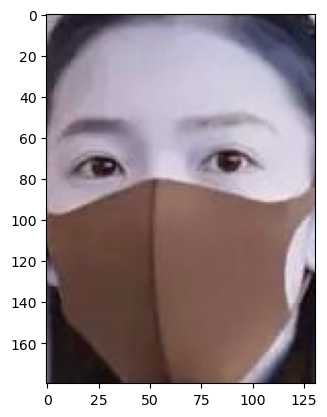

In [2]:
#Load the random BGR image -
img_array = cv2.imread("C:/Users/om/Desktop/dataset/with_mask/0_0_0 copy 20.jpg")
plt.imshow(img_array)

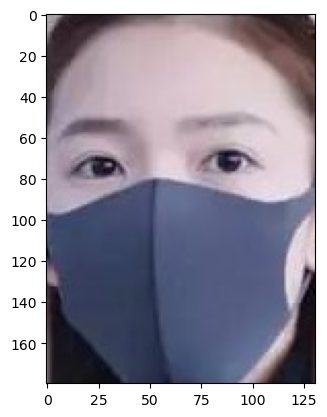

In [3]:
#Load the random RGB image -
img_array = cv2.imread("C:/Users/om/Desktop/dataset/with_mask/0_0_0 copy 20.jpg")
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [4]:
#Checking the shape of the image -
img_array.shape

(180, 131, 3)

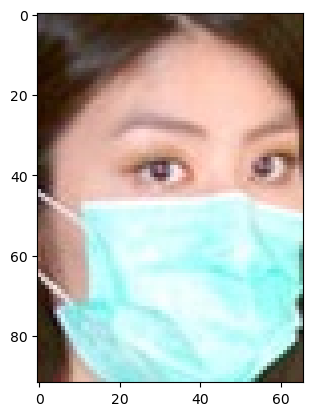

In [5]:
#Lets load the dataset -
Datadirectory ="C:/Users/om/Desktop/dataset/"
Classes = ["with_mask","without_mask"]
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

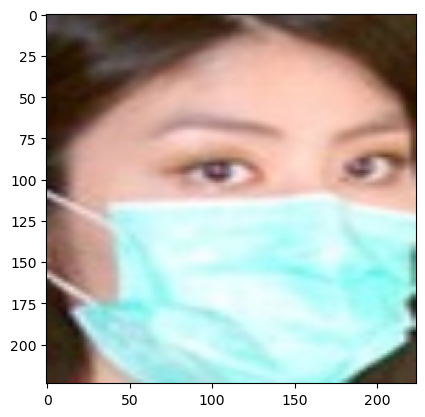

In [6]:
#Reshaping the images size -
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
#Read images and converit into array -
training_data = []
def create_training_data():
    for category in Classes:        
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)  # Class Labels- 0,1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [8]:
print(len(training_data))

3811


In [9]:
import random
random.shuffle(training_data)

In [10]:
X = [] #data
y = [] #Labels

for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [11]:
X.shape

(3811, 224, 224, 3)

In [12]:
#Normalize the data -
X = X/255.0;

In [13]:
print(y[0])
print(y[125])

0
0


In [14]:
Y = np.array(y)

In [15]:
#Saving the pickle file -
import joblib
joblib.dump(X,'training_data.pkl')
joblib.dump(Y,'labeled_data.pkl')

['labeled_data.pkl']

In [16]:
#Loading the pickle file -
X = joblib.load('training_data.pkl')
y = joblib.load('labeled_data.pkl')

In [17]:
#Creating object for the algorithm -
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
#Transfer Learning (Loading Pre-Treained weights and Tunning the weights from last checkpoint) -
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [19]:
base_input = model.layers[0].input

In [20]:
base_output = model.layers[-4].input

In [21]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)  #0,1
final_output = layers.Activation('sigmoid')(final_output)

In [22]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [23]:
new_model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [24]:
new_model.fit(X,Y,epochs=4,validation_split=0.1)

Epoch 1/5
108/108 [==============================] - 18318s 170s/step - loss: 0.1008 - accuracy: 0.9711 - val_loss: 0.0283 - val_accuracy: 0.9921
Epoch 2/5
108/108 [==============================] - 563s 5s/step - loss: 0.0289 - accuracy: 0.9930 - val_loss: 0.0138 - val_accuracy: 0.9948
Epoch 3/5
108/108 [==============================] - 492s 5s/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.0068 - val_accuracy: 0.9974
Epoch 4/5
108/108 [==============================] - 492s 5s/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0352 - val_accuracy: 0.9921
Epoch 5/5
108/108 [==============================] - 493s 5s/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0931 - val_accuracy: 0.9791


In [25]:
new_model.save('train_model.h5')

In [3]:
new_model = tf.keras.models.load_model('train_model.h5')

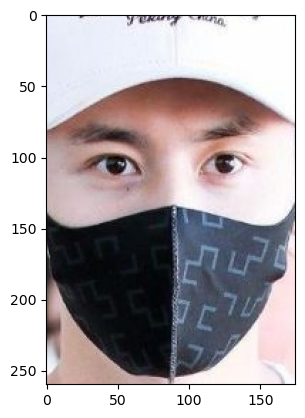

In [71]:
#Making the predictions for masked image -
frame = cv2.imread('C:/Users/om/Desktop/dataset/with_mask/139.JPG')
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [72]:
frame.shape

(260, 175, 3)

In [47]:
prediction = new_model.predict(final_image)
prediction

1/1 [==============================] - 0s 95ms/step


array([[2.4429012e-08]], dtype=float32)

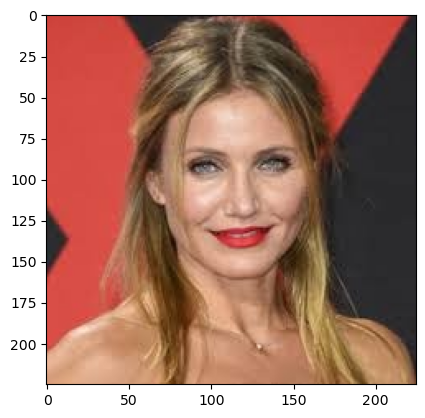

In [73]:
#Making the predictions for Un-masked image -
frame = cv2.imread('C:/Users/om/Desktop/dataset/without_mask/74.JPG')
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [74]:
frame.shape

(225, 225, 3)

In [75]:
prediction = new_model.predict(final_image)
prediction

1/1 [==============================] - 0s 120ms/step


array([[0.9999983]], dtype=float32)

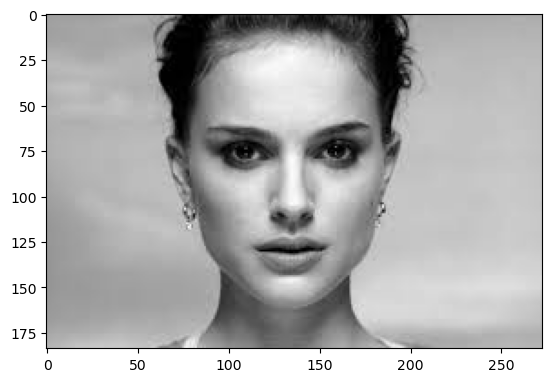

In [90]:
#Taking random image -
frame = cv2.imread('C:/Users/om/Desktop/dataset/without_mask/460.JPG')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

(184, 273)


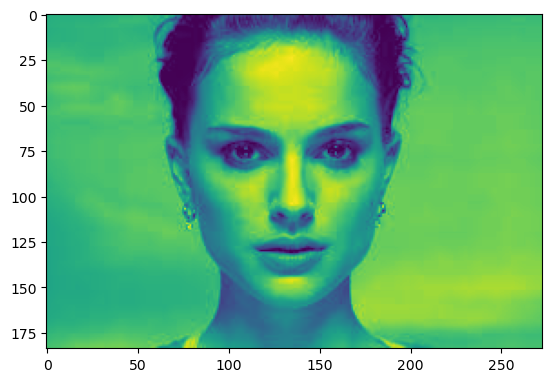

In [91]:
#haarcascade_frontalface_default.xml file should be fetched from root directory -
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
print(gray.shape)

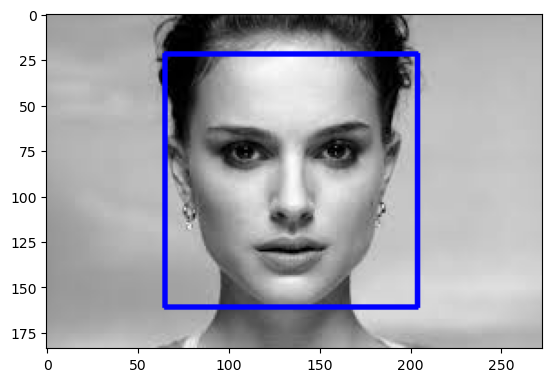

In [92]:
#Creating boundry around the face -
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face Not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 100ms/step
Mask Detected


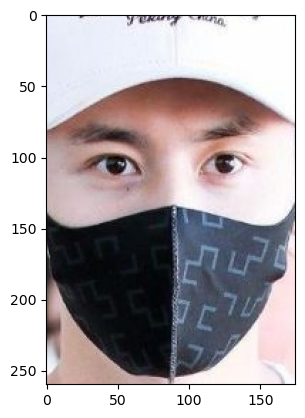

In [10]:
#App.py Live Demo for Image Prediction-
#frame = cv2.imread('C:/Users/om/Desktop/dataset/without_mask/460.JPG')
frame = cv2.imread('C:/Users/om/Desktop/dataset/with_mask/139.JPG')
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
prediction = new_model.predict(final_image)
prediction
if prediction > 0.25:
    print("Mask Not Detected")
else:
    print("Mask Detected")

In [11]:
#App.py Live Demo for Webcam Image Prediction-
import cv2
path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#Set rectangle background to white -
rectangle_bgr = (255,255,255)
#make a black image -
img = np.zeros((500,500))
#set some text -
text = "Some text in a box!"
#Get width and height of the textbox -
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
#set the text start position -
text_offset_x = 10
text_offset_y=img.shape[0] - 25
#make the coordinates of the box with a small padding of two pixels -
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width +2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)
#check if the webcam is opened correctly -
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face Not Detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    prediction = new_model.predict(final_image)
    font_scale = 1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if prediction > 0.25:
        status = "No Mask"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle -
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add text -
        cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255)) 
    else:
        status = "Face Mask"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectagle -
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add text -
        cv2.putText(frame, status, (x1 + int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        cv2.putText(frame, status, (100,150), font, 3,(0,255,0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
        
    cv2.imshow('Face Mask Detection Project',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()       

Face Not Detected
1/1 [==============================] - 0s 58ms/step
Face Not Detected
1/1 [==============================] - 0s 63ms/step
Face Not Detected
1/1 [==============================] - 0s 66ms/step
Face Not Detected
1/1 [==============================] - 0s 63ms/step
Face Not Detected
1/1 [==============================] - 0s 52ms/step
Face Not Detected
1/1 [==============================] - 0s 61ms/step
Face Not Detected
1/1 [==============================] - 0s 48ms/step
Face Not Detected
1/1 [==============================] - 0s 47ms/step
Face Not Detected
1/1 [==============================] - 0s 54ms/step
Face Not Detected
1/1 [==============================] - 0s 55ms/step
Face Not Detected
1/1 [==============================] - 0s 51ms/step
Face Not Detected
1/1 [==============================] - 0s 48ms/step
Face Not Detected
1/1 [==============================] - 0s 47ms/step
Face Not Detected
1/1 [==============================] - 0s 55ms/step
Face Not Detected
1/

In [83]:
#App.py Live Demo for Webcam Image Prediction with noise-
import winsound
import cv2
frequency = 2500
duration = 1000

path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#Set rectangle background to white -
rectangle_bgr = (255,255,255)
#make a black image -
img = np.zeros((500,500))
#set some text -
text = "Some text in a box!"
#Get width and height of the textbox -
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
#set the text start position -
text_offset_x = 10
text_offset_y=img.shape[0] - 25
#make the coordinates of the box with a small padding of two pixels -
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width +2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)
#check if the webcam is opened correctly -
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face Not Detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    prediction = new_model.predict(final_image)
    font_scale = 1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if prediction > 0.25:
        status = "No Mask"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle -
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add text -
        cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status, (100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255)) 
        winsound.Beep(frequency, duration)
    else:
        status = "Face Mask"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectagle -
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add text -
        cv2.putText(frame, status, (x1 + int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        cv2.putText(frame, status, (100,150), font, 3,(0,255,0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
        
    cv2.imshow('Face Mask Detection Project',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

1/1 [==============================] - 0s 86ms/step
Face Not Detected
Face Not Detected
1/1 [==============================] - 0s 85ms/step
Face Not Detected
1/1 [==============================] - 0s 81ms/step
Face Not Detected
1/1 [==============================] - 0s 91ms/step
Face Not Detected
Face Not Detected
Face Not Detected
1/1 [==============================] - 0s 81ms/step
Face Not Detected
Face Not Detected
1/1 [==============================] - 0s 79ms/step
Face Not Detected
Face Not Detected
Face Not Detected
1/1 [==============================] - 0s 82ms/step
Face Not Detected
Face Not Detected
Face Not Detected
1/1 [==============================] - 0s 80ms/step
